# Explore a grid

***
This notebook illustrates how to explore grid values.
***

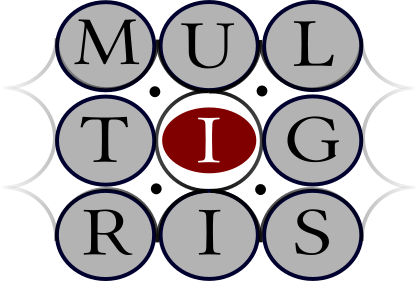

In [1]:
%load_ext autoreload
%autoreload 2
from wand.image import Image as WImage #this is to view PDFs
from IPython.display import Image
Image(filename='../Images/logo.png') 

## Imports and context <a class="anchor" id="s1"></a>
***

In [1]:
from Library.lib_class import ModelGrid
from copy import deepcopy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import sys
import random
import seaborn as sns

In [2]:
context = '../Contexts/mgris_sfgx/'
grid_fname = context+"Grids/model_grid.fth"
ppgrid_fname = context+"Grids/model_grid_post_processing.fth"

## Examining a secondary parameter <a class="anchor" id="s1"></a>
***

         #model_number  age    n    u      Z    Lx   Tx   cut  lum  Z_dust  \
0                  0.0  0.0  0.0  0.0  0.111 -40.0  0.0  0.00  7.0    -1.0   
1                  1.0  0.0  0.0  0.0  0.111 -40.0  0.0  0.25  7.0    -1.0   
2                  2.0  0.0  0.0  0.0  0.111 -40.0  0.0  0.50  7.0    -1.0   
3                  3.0  0.0  0.0  0.0  0.111 -40.0  0.0  0.75  7.0    -1.0   
4                  4.0  0.0  0.0  0.0  0.111 -40.0  0.0  1.00  7.0    -1.0   
...                ...  ...  ...  ...    ...   ...  ...   ...  ...     ...   
2435842      2435842.0  1.0  4.0 -4.0 -2.190  -1.0  7.0  3.00  8.0     1.0   
2435843      2435843.0  1.0  4.0 -4.0 -2.190  -1.0  7.0  3.25  8.0     1.0   
2435844      2435844.0  1.0  4.0 -4.0 -2.190  -1.0  7.0  3.50  8.0     1.0   
2435845      2435845.0  1.0  4.0 -4.0 -2.190  -1.0  7.0  3.75  8.0     1.0   
2435846      2435846.0  1.0  4.0 -4.0 -2.190  -1.0  7.0  4.00  8.0     1.0   

         fescL(1-1.8)  fescL(20-infty)  
0       -7.629395e-07 

/tmp/ipykernel_315918/523671344.py:21: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  df = df.iloc[random.sample(set(np.arange(len(df))), int(nrndsamples))]


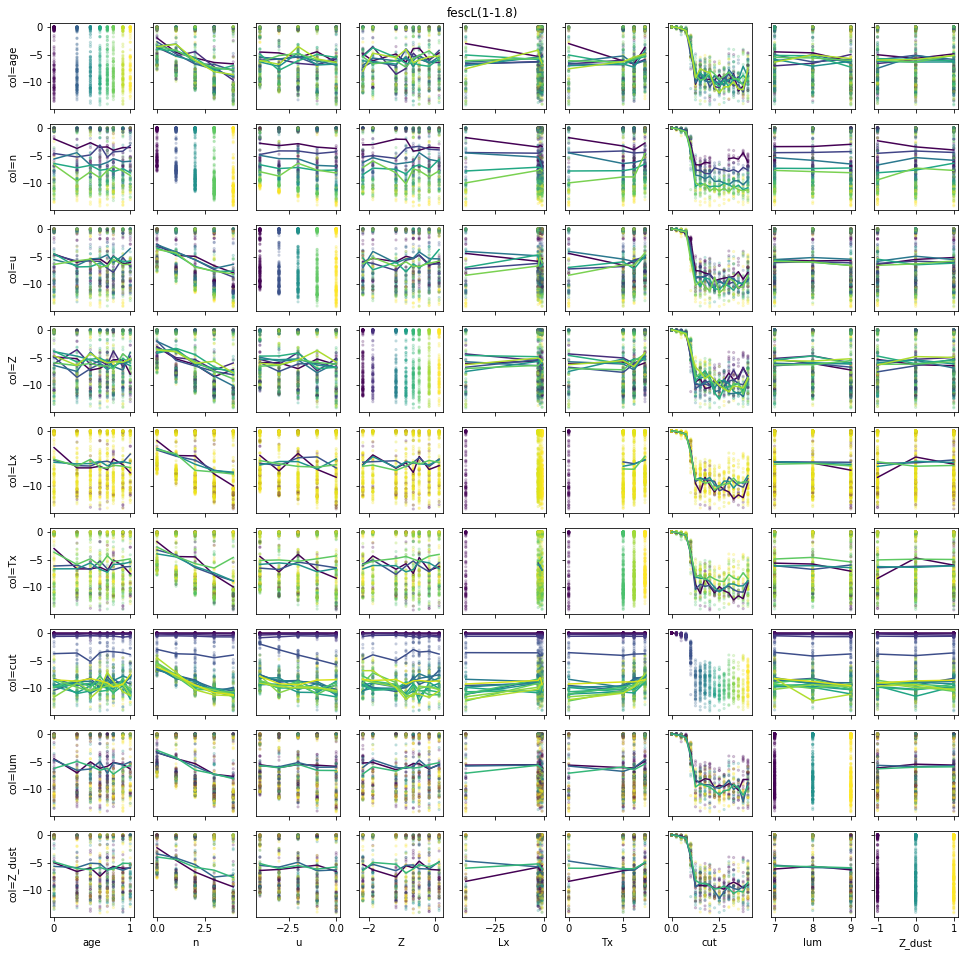

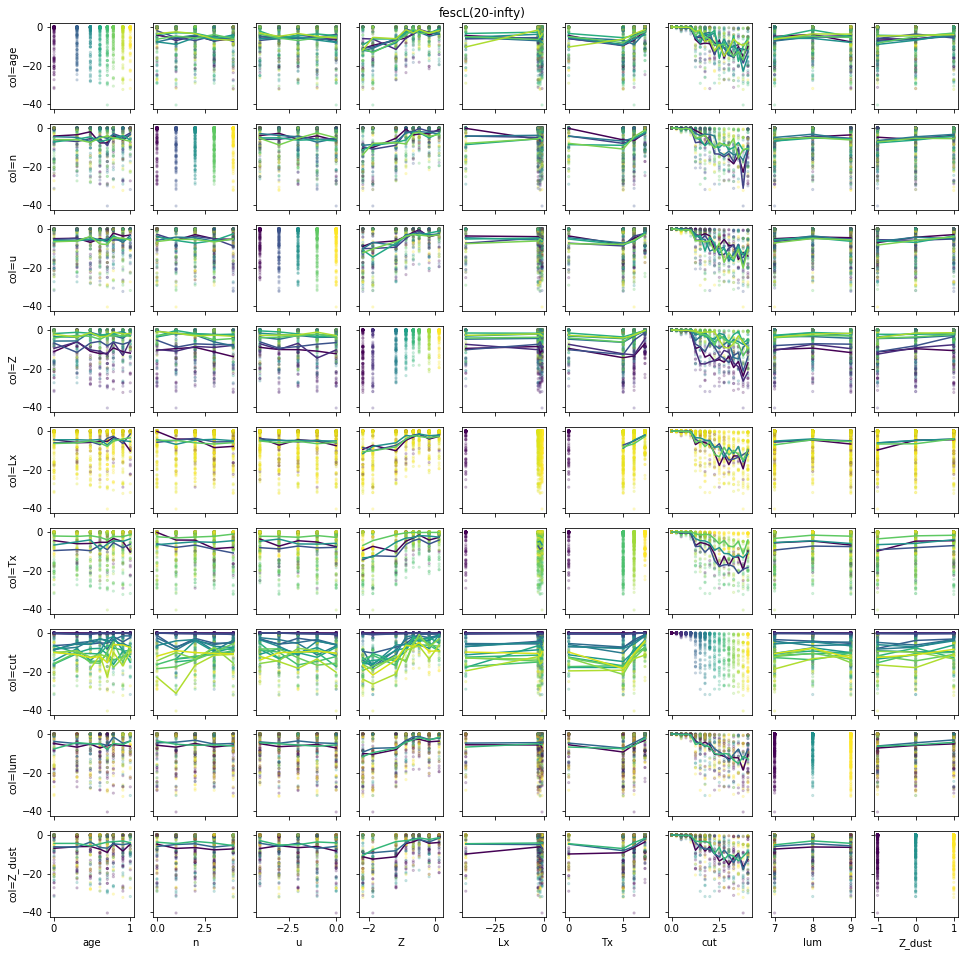

In [7]:
secparams = ["fescL(1-1.8)", "fescL(20-infty)"]
commoncolumn = "#model_number" #this is to merge grid and ppgrid
params_name = ["age", "n", "u", "Z", "Lx", "Tx", "cut", "lum", "Z_dust"]

grid = ModelGrid(params=params_name)
grid.values = grid.readtable(grid_fname, add=params_name+[commoncolumn,], delimiter_f="\t")
grid.get_param_values(names=params_name)
n_params = len(params_name)

grid.mergewith(ppgrid_fname, commoncolumn, add=secparams)

print(grid.values)
df = grid.values

df[df == np.inf] = np.nan
df[df == -np.inf] = np.nan
df = df.dropna()

# take a random sample?
nrndsamples = np.min([1e3, len(df)])
df = df.iloc[random.sample(set(np.arange(len(df))), int(nrndsamples))]

for secparam in secparams:

    fig, axs = plt.subplots(
        n_params, n_params, figsize=(1.5 * n_params, 1.5 * n_params)
    )
    fig.suptitle(secparam)
    for ip, pi in enumerate(params_name):
        for jp, pj in enumerate(params_name):
            ax = axs[jp, ip]
            alpha = np.min([1, 200 / nrndsamples])
            ax.scatter(df[pi], df[secparam], marker="o", s=5, c=df[pj], alpha=alpha)
            dz = grid.params.values[pj]
            # color code using indices
            s_map = plt.cm.ScalarMappable(mcolors.Normalize(vmin=0, vmax=len(dz)), cmap=plt.cm.viridis) 
            # or values
            #s_map = plt.cm.ScalarMappable(mcolors.Normalize(vmin=np.min(dz), vmax=np.max(dz)), cmap=plt.cm.viridis)
            for i, v in enumerate(grid.params.values[pj]):
                y = [df.loc[df[pj]==v].loc[df[pi]==v2].mean()[secparam] for v2 in grid.params.values[pi]]
                #ax.plot(grid.params.values[pi], y, color=s_map.to_rgba(v))
                ax.plot(grid.params.values[pi], y, color=s_map.to_rgba(i))
            if jp < n_params - 1:
                ax.set(xticklabels=[])
            else:
                ax.set_xlabel(pi)
            if ip > 0:
                ax.set(yticklabels=[])
            else:
                ax.set_ylabel(f"col={pj}")

    plt.tight_layout()
    plt.show()

Selecting a subset

         #model_number  age    n    u      Z    Lx   Tx   cut  lum  Z_dust  \
0                  0.0  0.0  0.0  0.0  0.111 -40.0  0.0  0.00  7.0    -1.0   
1                  1.0  0.0  0.0  0.0  0.111 -40.0  0.0  0.25  7.0    -1.0   
2                  2.0  0.0  0.0  0.0  0.111 -40.0  0.0  0.50  7.0    -1.0   
3                  3.0  0.0  0.0  0.0  0.111 -40.0  0.0  0.75  7.0    -1.0   
17                17.0  0.0  0.0  0.0  0.111  -3.0  5.0  0.00  7.0    -1.0   
...                ...  ...  ...  ...    ...   ...  ...   ...  ...     ...   
2435816      2435816.0  1.0  4.0 -4.0 -2.190  -1.0  6.0  0.75  8.0     1.0   
2435830      2435830.0  1.0  4.0 -4.0 -2.190  -1.0  7.0  0.00  8.0     1.0   
2435831      2435831.0  1.0  4.0 -4.0 -2.190  -1.0  7.0  0.25  8.0     1.0   
2435832      2435832.0  1.0  4.0 -4.0 -2.190  -1.0  7.0  0.50  8.0     1.0   
2435833      2435833.0  1.0  4.0 -4.0 -2.190  -1.0  7.0  0.75  8.0     1.0   

         fescL(1-1.8)  fescL(20-infty)  
0       -7.629395e-07 

/tmp/ipykernel_315918/820418767.py:26: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  df = df.iloc[random.sample(set(np.arange(len(df))), int(nrndsamples))]


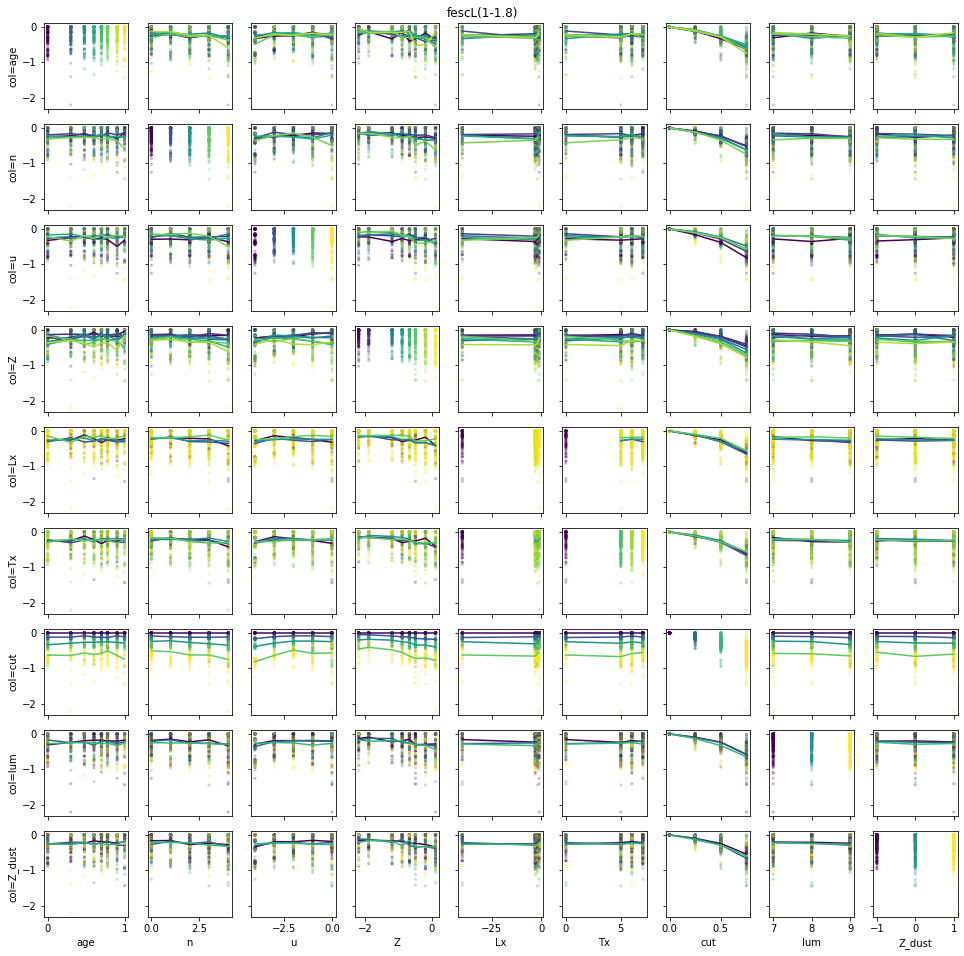

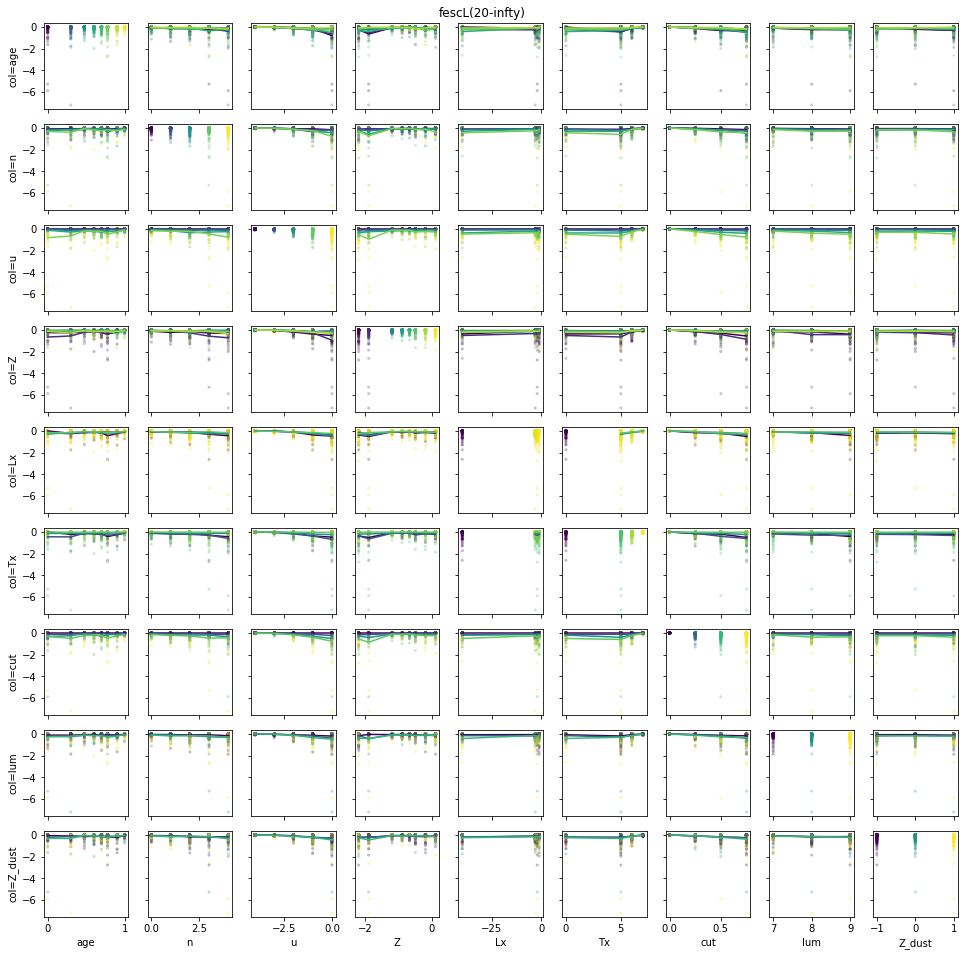

In [5]:
secparams = ["fescL(1-1.8)", "fescL(20-infty)"]
commoncolumn = "#model_number" #this is to merge grid and ppgrid
params_name = ["age", "n", "u", "Z", "Lx", "Tx", "cut", "lum", "Z_dust"]

grid = ModelGrid(params=params_name)
grid.values = grid.readtable(grid_fname, add=params_name+[commoncolumn,], delimiter_f="\t")
grid.get_param_values(names=params_name)
n_params = len(params_name)

grid.mergewith(ppgrid_fname, commoncolumn, add=secparams)

#here we select a subset of the grid
grid.values = grid.values.loc[grid.values['cut'] < 1]
#update values
grid.get_param_values(names=params_name)

print(grid.values)
df = grid.values

df[df == np.inf] = np.nan
df[df == -np.inf] = np.nan
df = df.dropna()

# take a random sample?
nrndsamples = np.min([1e3, len(df)])
df = df.iloc[random.sample(set(np.arange(len(df))), int(nrndsamples))]

for secparam in secparams:

    fig, axs = plt.subplots(
        n_params, n_params, figsize=(1.5 * n_params, 1.5 * n_params)
    )
    fig.suptitle(secparam)
    for ip, pi in enumerate(params_name):
        for jp, pj in enumerate(params_name):
            ax = axs[jp, ip]
            alpha = np.min([1, 200 / nrndsamples])
            ax.scatter(df[pi], df[secparam], marker="o", s=5, c=df[pj], alpha=alpha)
            dz = grid.params.values[pj]
            s_map = plt.cm.ScalarMappable(mcolors.Normalize(vmin=0, vmax=len(dz)), cmap=plt.cm.viridis)
            #s_map = plt.cm.ScalarMappable(mcolors.Normalize(vmin=np.min(dz), vmax=np.max(dz)), cmap=plt.cm.viridis)
            for i,v in enumerate(grid.params.values[pj]):
                y = [df.loc[df[pj]==v].loc[df[pi]==v2].mean()[secparam] for v2 in grid.params.values[pi]]
                ax.plot(grid.params.values[pi], y, color=s_map.to_rgba(i))
                #ax.plot(grid.params.values[pi], y, color=s_map.to_rgba(v))
            if jp < n_params - 1:
                ax.set(xticklabels=[])
            else:
                ax.set_xlabel(pi)
            if ip > 0:
                ax.set(yticklabels=[])
            else:
                ax.set_ylabel(f"col={pj}")

    plt.tight_layout()
    plt.show()

## Computing new quantity and explore parameter ranges <a class="anchor" id="s1"></a>
***

             index  C2157.636m  O163.1679m  age    n    u      Z    Lx   Tx  \
0              0.0   28.818001   23.955999  0.0  0.0  0.0  0.111 -40.0  0.0   
1              1.0   35.365002   31.424999  0.0  0.0  0.0  0.111 -40.0  0.0   
2              2.0   36.623001   33.151001  0.0  0.0  0.0  0.111 -40.0  0.0   
3              3.0   37.493999   34.333000  0.0  0.0  0.0  0.111 -40.0  0.0   
4              4.0   38.351002   36.056999  0.0  0.0  0.0  0.111 -40.0  0.0   
...            ...         ...         ...  ...  ...  ...    ...   ...  ...   
2435842  2435842.0        -inf        -inf  1.0  4.0 -4.0 -2.190  -1.0  7.0   
2435843  2435843.0        -inf        -inf  1.0  4.0 -4.0 -2.190  -1.0  7.0   
2435844  2435844.0        -inf        -inf  1.0  4.0 -4.0 -2.190  -1.0  7.0   
2435845  2435845.0        -inf        -inf  1.0  4.0 -4.0 -2.190  -1.0  7.0   
2435846  2435846.0        -inf        -inf  1.0  4.0 -4.0 -2.190  -1.0  7.0   

          cut  lum  Z_dust  
0        0.00  7.0    

/tmp/ipykernel_315918/2627832900.py:30: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  df = df.iloc[random.sample(set(np.arange(len(df))), int(nrndsamples))]


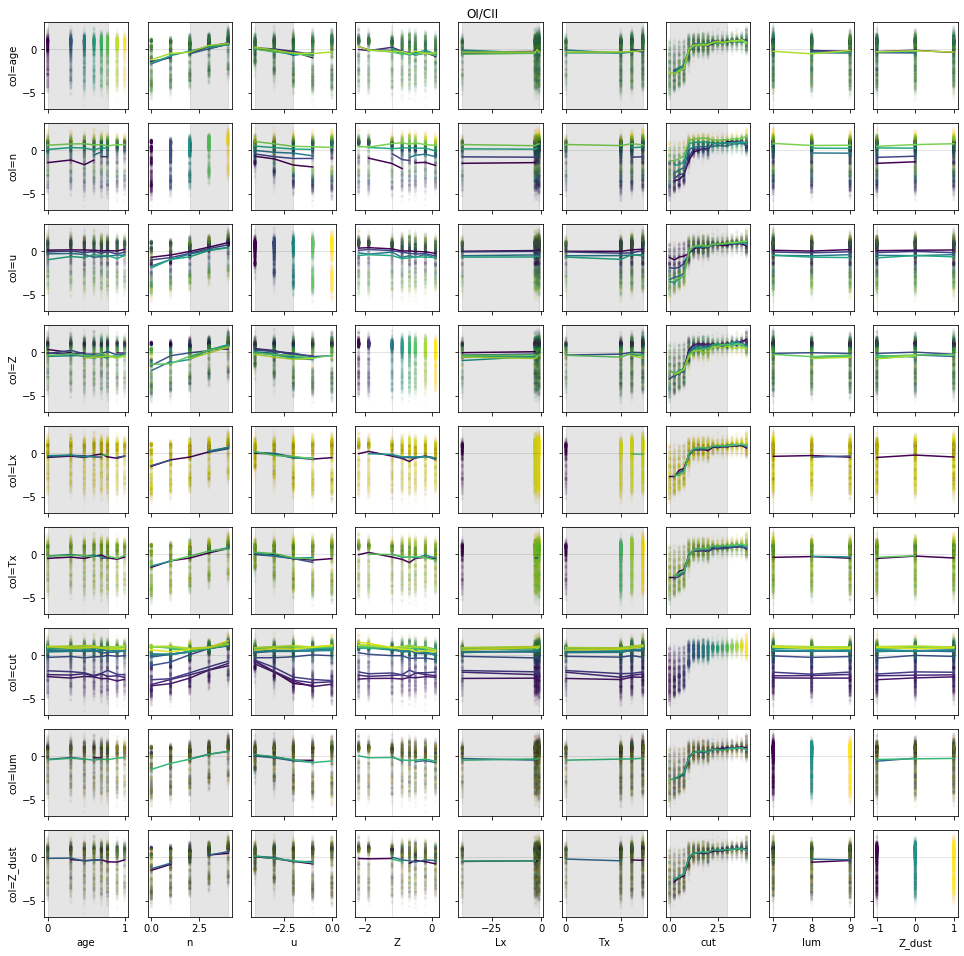

In [6]:
observables = ["C2157.636m", "O163.1679m"]
params_name = ["age", "n", "u", "Z", "Lx", "Tx", "cut", "lum", "Z_dust"]

grid = ModelGrid(params=params_name)
grid.values = grid.readtable(grid_fname, add=observables + params_name, delimiter_f="\t")
grid.get_param_values(names=params_name)
n_params = len(params_name)

print(grid.values)
print(grid.params.values)
df = grid.values

quantity = "OI/CII"
df[quantity] = df["O163.1679m"] - df["C2157.636m"]
# show subset of models that match some constraints
ref = [0, 0.02]
df2 = deepcopy(df)
df2 = df2.loc[df2[quantity] > ref[0]].loc[df2[quantity] < ref[1]]

df2 = df2.loc[df["Z"] >= -1.699].loc[df["Z"] <= -1.0]
df2 = df2.loc[df["lum"] == 7]
df2 = df2.loc[df["Z_dust"] == -1.0]

df2[df2 == np.inf] = np.nan
df2[df2 == -np.inf] = np.nan
df2 = df2.dropna()

# take a random sample?
nrndsamples = np.min([1e4, len(df)])
df = df.iloc[random.sample(set(np.arange(len(df))), int(nrndsamples))]

fig, axs = plt.subplots(
    n_params, n_params, figsize=(1.5 * n_params, 1.5 * n_params), sharey="col"
)
fig.suptitle(quantity)
for ip, pi in enumerate(params_name):
    for jp, pj in enumerate(params_name):
        ax = axs[jp, ip]
        alpha = np.min([1, 200 / nrndsamples])
        ax.scatter(df[pi], df[quantity], marker="o", s=5, c=df[pj], alpha=alpha)
        ax.axhspan(ref[0], ref[1], alpha=0.1, color="black", zorder=10)
        ax.axvspan(df2[pi].min(), df2[pi].max(), alpha=0.1, color="black", zorder=10)
        dz = grid.params.values[pj]
        s_map = plt.cm.ScalarMappable(mcolors.Normalize(vmin=0, vmax=len(dz)), cmap=plt.cm.viridis)
        #s_map = plt.cm.ScalarMappable(mcolors.Normalize(vmin=np.min(dz), vmax=np.max(dz)), cmap=plt.cm.viridis)
        for i,v in enumerate(grid.params.values[pj]):
            y = [df.loc[df[pj]==v].loc[df[pi]==v2].mean()[quantity] for v2 in grid.params.values[pi]]
            ax.plot(grid.params.values[pi], y, color=s_map.to_rgba(i))
            #ax.plot(grid.params.values[pi], y, color=s_map.to_rgba(v))
        if jp < n_params - 1:
            ax.set(xticklabels=[])
        else:
            ax.set_xlabel(pi)
        if ip > 0:
            ax.set(yticklabels=[])
        else:
            ax.set_ylabel(f"col={pj}")

plt.tight_layout()
plt.show()

Another version where we focus on KDEs of parameter sets for which the reference value is matched in the grid

             index  O425.8832m  Ne315.5509m    age    n    u      Z   Lx   Tx  \
981          981.0   38.158001    38.557999  0.000  0.0  0.0 -1.190 -1.0  5.0   
982          982.0   38.158001    38.557999  0.000  0.0  0.0 -1.190 -1.0  5.0   
983          983.0   38.158001    38.557999  0.000  0.0  0.0 -1.190 -1.0  5.0   
984          984.0   38.158001    38.557999  0.000  0.0  0.0 -1.190 -1.0  5.0   
985          985.0   38.158001    38.557999  0.000  0.0  0.0 -1.190 -1.0  5.0   
...            ...         ...          ...    ...  ...  ...    ...  ...  ...   
2382733  2382733.0   38.679501    39.079498  0.903  2.0  0.0 -1.190 -1.0  7.0   
2382734  2382734.0   38.679501    39.079498  0.903  2.0  0.0 -1.190 -1.0  7.0   
2412190  2412190.0   38.626499    39.026501  1.000  1.0 -2.0 -0.668 -1.0  7.0   
2412191  2412191.0   38.626499    39.026501  1.000  1.0 -2.0 -0.668 -1.0  7.0   
2412199  2412199.0   38.626499    39.027000  1.000  1.0 -2.0 -0.668 -1.0  7.0   

          cut  lum  Z_dust 

/local/home/vleboute/miniconda3/lib/python3.9/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


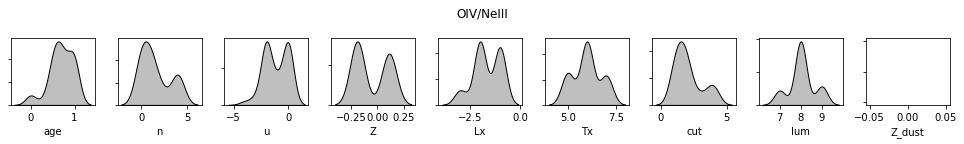

In [14]:
observables = ["O425.8832m", "Ne315.5509m"]
params_name = ["age", "n", "u", "Z", "Lx", "Tx", "cut", "lum", "Z_dust"]

grid = ModelGrid(params=params_name)
grid.values = grid.readtable(grid_fname, add=observables + params_name, delimiter_f="\t")
grid.get_param_values(names=params_name)
n_params = len(params_name)

#print(grid.values)
#print(grid.params.values)
df = grid.values

quantity = "OIV/NeIII"
df[quantity] = df["O425.8832m"] - df["Ne315.5509m"]
# show subset of models that match some constraints
ref = -0.40+np.array([-0.001, 0.001])

df2 = deepcopy(df)
df2 = df2.loc[df2[quantity] > ref[0]].loc[df2[quantity] < ref[1]]
print(df2)

#df2 = df2.loc[df["lum"] == 7]
df2 = df2.loc[df["Z_dust"] == 0]
df2 = df2.loc[df["Z"] >= -0.3]
df2 = df2.loc[df["cut"] >=1]

df2[df2 == np.inf] = np.nan
df2[df2 == -np.inf] = np.nan
df2 = df2.dropna()

# take a random sample?
#nrndsamples = np.min([1e4, len(df)])
#df = df.iloc[random.sample(set(np.arange(len(df))), int(nrndsamples))]

fig, axs = plt.subplots(
    1, n_params, figsize=(1.5 * n_params, 2), sharey="col"
)
fig.suptitle(quantity)
for ip, pi in enumerate(params_name):
    ax = axs[ip]
    sns.kdeplot(df2[pi], ax=ax, color='black', fill=True)
    ax.set_xlabel(pi)
    ax.set(yticklabels=[])
    ax.set_ylabel('')

fig.tight_layout()
plt.show()

Same in 2D

/tmp/ipykernel_1418974/1338484221.py:31: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  df = df.iloc[random.sample(set(np.arange(len(df))), int(nrndsamples))]
/local/home/vleboute/miniconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/local/home/vleboute/miniconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/local/home/vleboute/miniconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: Future

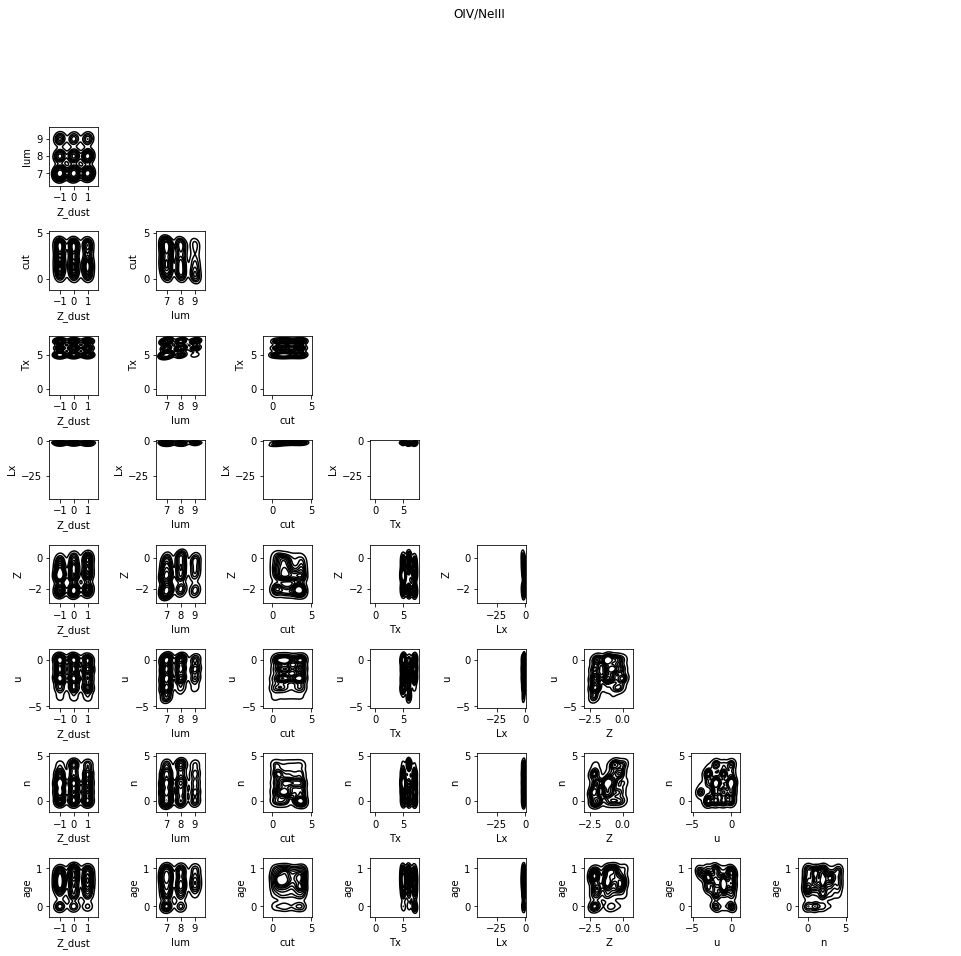

In [16]:
observables = ["O425.8832m", "Ne315.5509m"]
params_name = ["age", "n", "u", "Z", "Lx", "Tx", "cut", "lum", "Z_dust"]

grid = ModelGrid(params=params_name)
grid.values = grid.readtable(grid_fname, add=observables + params_name, delimiter_f="\t")
grid.get_param_values(names=params_name)
n_params = len(params_name)

#print(grid.values)
#print(grid.params.values)
df = grid.values

quantity = "OIV/NeIII"
df[quantity] = df["O425.8832m"] - df["Ne315.5509m"]
# show subset of models that match some constraints
ref = -0.40+np.array([-0.001, 0.001])

df2 = deepcopy(df)
df2 = df2.loc[df2[quantity] > ref[0]].loc[df2[quantity] < ref[1]]

#df2 = df2.loc[df["Z"] >= -1.699].loc[df["Z"] <= -1.0]
#df2 = df2.loc[df["lum"] == 7]
#df2 = df2.loc[df["Z_dust"] == -1.0]

df2[df2 == np.inf] = np.nan
df2[df2 == -np.inf] = np.nan
df2 = df2.dropna()

# take a random sample?
nrndsamples = np.min([1e4, len(df)])
df = df.iloc[random.sample(set(np.arange(len(df))), int(nrndsamples))]

fig, axs = plt.subplots(
    n_params, n_params, figsize=(1.5 * n_params, 1.5 * n_params)
)
fig.suptitle(quantity)
for ip, pi in enumerate(params_name):
    for jp, pj in enumerate(params_name):
        ax = axs[n_params-jp-1, n_params-ip-1]
        if jp>=ip:
            ax.axis('off')
            continue
        try:
            sns.kdeplot(data=df2[quantity],x=df2[pi], y=df2[pj], ax=ax, color='black')
        except:
            print(pi, pj)
        ax.set_xlabel(pi)
        ax.set_ylabel(pj)
        
plt.tight_layout()
plt.show()